-4
-3
0
4


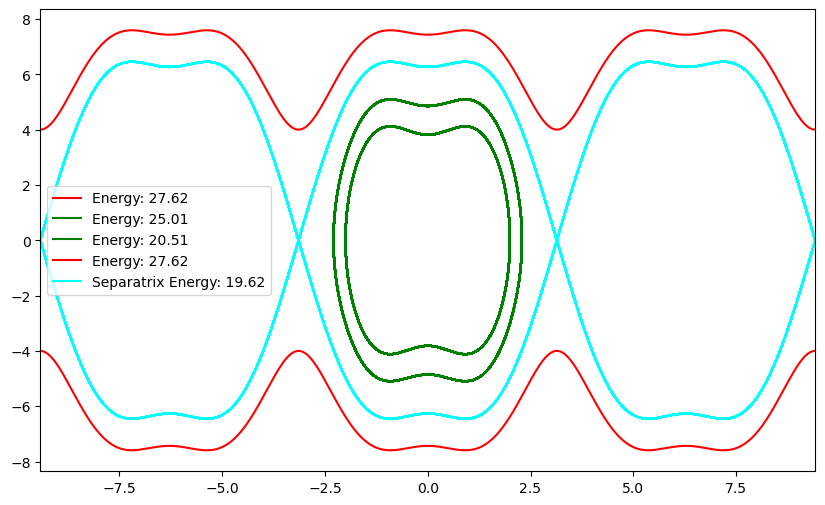

In [167]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

g = 9.81 # m/s^2
R = 1 # m
w = 4
time = np.arange(0, 40*np.pi, 1e-3)

def phi_derivatives(x,t):
    return [x[1], (((w**2)*(np.cos(x[0]))) - (g/R))*np.sin(x[0])]

def Energy(theta,omega):
    return (0.5*(w**2)*(np.sin(theta))**2)+g*(1-(np.cos(theta))) + 0.5*omega**2

ilist = [-4,-3,0,4]
plt.figure(figsize=(10, 6))
for i in ilist:
    print(i)
    if i <= -1*np.pi :
        phi, dphi = odeint(phi_derivatives, [3*np.pi,i], time).T
        plt.plot(phi,dphi, label=f'Energy: {Energy(3*np.pi,i):.2f}', color='red')
        plt.xlim(-10,10)
        plt.legend()
    if i > -1*np.pi and i <= np.pi:
        phi, dphi = odeint(phi_derivatives, [2, i], time).T
        plt.plot(phi,dphi, label=f'Energy: {Energy(2,i):.2f}', color='green')
        plt.xlim(-10,10)
        plt.legend()
    if i == 4:
        phi, dphi = odeint(phi_derivatives, [-3*np.pi,i], time).T
        plt.plot(phi,dphi, label=f'Energy: {Energy(-3*np.pi,i):.2f}', color='red')
        plt.xlim(-10,10)
        plt.legend()
phi, dphi = odeint(phi_derivatives, [np.pi,0], time).T
plt.plot(phi+2*np.pi,dphi, color= 'cyan')
plt.plot(phi-2*np.pi,dphi, color= 'cyan')
plt.plot(phi,dphi, color= 'cyan', label= f'Separatrix Energy: {Energy(np.pi+0.000001,0):.2f}')
plt.xlim(-3*np.pi,3*np.pi)
plt.legend()